# Data Preparation

This notebook details the initial steps of preparing the `NYS Oil & Gas Wells` dataset for analysis. It includes data loading, understanding, and cleaning processes to ensure the data is in a format for further analysis. Key tasks involve handling missing values, encoding categorical variables, normalizing numerical features, and addressing any data quality issues.

By the end of this notebook, the dataset will be transformed into a refined version ready for exploratory data anlanlysis and model development.

### Loading Tools and Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import os, zipfile, glob
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:,.2f}'.format)

In [2]:
file_paths = glob.glob("../data/oilgas_prod/Prod*.csv")
data_frames = []
for file_path in file_paths:
    df = pd.read_csv(file_path)
    data_frames.append(df)

prod_data = pd.concat(data_frames, ignore_index=True)
well_data = pd.read_csv('../data/oilgas_wells.csv', low_memory=False)

df_oilgas = pd.merge(well_data, prod_data, on='API_WellNo', how='outer')
df_oilgas.to_csv('../data/merged_oilgas_prodwells.csv', index=False)

with zipfile.ZipFile('../data/merged_oilgas_prodwells.csv.zip', 'w', zipfile.ZIP_DEFLATED) as zipf:
    zipf.write('../data/merged_oilgas_prodwells.csv', arcname='merged_oilgas_prodwells.csv')
df = df_oilgas.copy()

## Understanding the Data
- Dataframe `shape`
- `info`
- `head` and `tail`
- `describe`
- `unique` values

In [3]:
df.shape

(350816, 71)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350816 entries, 0 to 350815
Data columns (total 71 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   API_WellNo               350816 non-null  int64  
 1   Cnty                     350816 non-null  int64  
 2   Hole_x                   350816 non-null  int64  
 3   SideTrck_x               350816 non-null  int64  
 4   Completion_x             350816 non-null  int64  
 5   Well_Name                350776 non-null  object 
 6   Company_name             350809 non-null  object 
 7   Operator_number          350816 non-null  int64  
 8   Well_Type                350816 non-null  object 
 9   Map_Symbol               350815 non-null  object 
 10  Well_Status              350816 non-null  object 
 11  Date_Status              86366 non-null   object 
 12  Date_Permit_Application  243196 non-null  object 
 13  Permit_Issued            248757 non-null  object 
 14  Date

In [5]:
df

,API_WellNo,Cnty,Hole_x,SideTrck_x,Completion_x,Well_Name,Company_name,Operator_number,Well_Type,Map_Symbol,Well_Status,Date_Status,Date_Permit_Application,Permit_Issued,Date_Spudded,Date_Total_Depth,Date_Well_Completed,Date_well_plugged,Date_well_confidential,confid,town_x,quad,quadsec,Producing_name,Producing_formation,Financial_security,Slant,County_x,Region,State_lease,Proposed_depth,Surface_location,Surface_Longitude,Surface_latitude,Bottom_hole_location,Bottom_hole_longitude,Bottom_hole_latitude,True_vertical_depth,Measured_depth,Kickoff,DrilledDepth,Elevation,Original_well_type,Permit_Fee,Objective_formation,Depth_Fee,Spacing,Spacing_Acres,Integration,Dt_Hearing,Dt_Mod,LINK,Location_Verified,GeneralWellType,GeneralWellStatus,County_y,CoName,Hole_y,SideTrck_y,Completion_y,Well_Typ,Field,Wl_Status,Well_Nm,town_y,Prod Form,MonthProd,GasProd,WaterProd,OilProd,Year
0,31001010720000,1,1072,0,0,Finch 1,Corona Typewriter,9372,NL,O,UN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Knox,Durham,C,Not Applicable,Not Applicable,False,Vertical,Albany,4.00,NaN,NaN,SURF,-74.13,42.49,BH,-74.13,42.49,"2,200.00","2,200.00",0.00,"2,200.00","1,155.00",OD,0.00,Not Applicable,0.00,NaN,NaN,NaN,NaN,2022-12-21 13:15:44.957000000,http://extapps.dec.ny.gov/cfmx/extapps/GasOil/...,NO,Other Well,Unplugged Well,Albany,Corona Typewriter,"1,072.00",0.00,0.00,NL,Not Applicable,UN,Finch 1,Knox,Not Applicable,NaN,NaN,NaN,NaN,"2,000.00"
1,31001010730000,1,1073,0,0,Hilton James 1,Belmont Quadrangle Drilling,9034,NL,O,UN,NaN,NaN,NaN,1907-01-01 00:00:00,1907-01-01 00:00:00,NaN,NaN,NaN,Pre-1989 Well (N/A),New Scotland,Voorheesville,I,Not Applicable,Not Applicable,False,Vertical,Albany,4.00,NaN,0.00,SURF,-73.91,42.64,BH,-73.91,42.64,0.00,0.00,0.00,0.00,423.00,NL,0.00,Not Applicable,0.00,Exempt from Title 5; variance needed from 6 NY...,NaN,NaN,NaN,2022-12-16 09:57:23.407000000,http://extapps.dec.ny.gov/cfmx/extapps/GasOil/...,NO,Other Well,Unplugged Well,Albany,Belmont Quadrangle Drilling,"1,073.00",0.00,0.00,NL,Not Applicable,UN,Hilton James 1,New Scotland,Not Applicable,NaN,NaN,NaN,NaN,"2,000.00"
2,31001210070000,1,21007,0,0,1,Turf Western Ave. Inc.,1903,TH,OP,PA,2016-04-06 00:00:00,1998-04-24 00:00:00,1998-07-16 00:00:00,1994-09-07 00:00:00,1994-09-13 00:00:00,1994-10-27 00:00:00,2016-04-06 00:00:00,NaN,Released,Guilderland,Albany,D,Not Applicable,NA - Geoexchange,True,Vertical,Albany,4.00,NaN,"1,500.00",SURF,-73.84,42.68,BH,-73.84,42.68,"1,500.00","1,500.00",0.00,"1,500.00",203.00,TH,475.00,NA - Geoexchange,375.00,Exempt - not an oil or gas well,NaN,NaN,NaN,2022-12-16 09:57:23.407000000,http://extapps.dec.ny.gov/cfmx/extapps/GasOil/...,NO,Geothermal Well,Plugged Well,Albany,"Turf Western Ave., Inc.","21,007.00",0.00,0.00,TH,Not Applicable,PA,1,Guilderland,NA - Geoexchange,NaN,NaN,NaN,NaN,"2,000.00"
3,31001210080000,1,21008,0,0,2,Turf Western Ave. Inc.,1903,TH,OP,PA,2016-04-06 00:00:00,1998-04-04 00:00:00,1998-07-16 00:00:00,1994-09-14 00:00:00,1994-09-21 00:00:00,1994-11-01 00:00:00,2016-04-06 00:00:00,NaN,Released,Guilderland,Albany,D,Not Applicable,Not Applicable,True,Vertical,Albany,4.00,NaN,"1,500.00",SURF,-73.84,42.68,BH,-73.84,42.68,"1,500.00","1,500.00",0.00,"1,500.00",204.00,TH,475.00,NA - Geoexchange,375.00,Exempt - not an oil or gas well,NaN,NaN,NaN,2022-12-16 09:57:23.407000000,http://extapps.dec.ny.gov/cfmx/extapps/GasOil/...,NO,Geothermal Well,Plugged Well,Albany,"Turf Western Ave., Inc.","21,008.00",0.00,0.00,TH,Not Applicable,PA,2,Guilderland,Not Applicable,NaN,NaN,NaN,NaN,"2,000.00"
4,31001210090000,1,21009,0,0,3,Turf Western Ave. Inc.,1903,TH,OP,PA,2016-05-06 00:00:00,1998-04-24 00:00:00,1998-07-16 00:00:00,1994-09-21 00:00:00,1994-09-28 00:00:00,1994-11-04 00:00:00,2016-05-06 00:00:00,NaN,Released,Guilderland,Albany,D,Not Applicable,Not Applicable,True,Vertical,Albany,4.00,NaN,"1,500.00",SURF,-73.84,42.68,BH,-73.84,42.68,"1,420.00","1,420.00",0.00,"1,420.00",204.00,TH,475.00,NA - Geoexchange,375.00,Exempt - not an oil or gas well,NaN,NaN,NaN,2022-12-

In [6]:
df.describe()

,API_WellNo,Cnty,Hole_x,SideTrck_x,Completion_x,Operator_number,Region,Proposed_depth,Surface_Longitude,Surface_latitude,Bottom_hole_longitude,Bottom_hole_latitude,True_vertical_depth,Measured_depth,Kickoff,DrilledDepth,Elevation,Permit_Fee,Depth_Fee,Spacing_Acres,Hole_y,SideTrck_y,Completion_y,MonthProd,GasProd,WaterProd,OilProd,Year
count,"350,816.00","350,816.00","350,816.00","350,816.00","350,816.00","350,816.00","350,810.00","343,663.00","350,496.00","350,496.00","350,367.00","350,367.00","350,810.00","350,810.00","350,810.00","350,810.00","258,171.00","350,401.00","350,810.00","9,101.00","324,421.00","324,421.00","324,421.00","318,225.00","290,612.00","300,871.00","276,202.00","324,421.00"
mean,"31,020,263,600,399.08",19.98,"28,212.86",0.00,0.02,"2,062.34",8.82,"1,655.61",-78.26,42.13,-78.26,42.13,"2,093.19","2,108.30",60.52,"2,049.25","1,419.48",405.33,361.49,183.46,"27,429.18",0.00,0.02,8.46,"2,239.45",49.62,22.70,"2,011.57"
std,"26,687,854,950.86",26.74,"20,467.98",0.08,0.14,"1,508.88",0.51,"1,723.47",4.77,2.55,4.77,2.56,"1,527.82","1,593.78",681.62,"1,414.41",483.12,589.53,551.39,218.05,"19,779.18",0.08,0.15,7.03,"41,557.41",624.74,98.21,6.91
min,"31,001,010,720,000.00",1.00,5.00,0.00,0.00,1.00,1.00,0.00,-79.76,0.00,-79.76,0.00,0.00,0.00,0.00,0.00,3.00,0.00,0.00,0.00,24.00,0.00,0.00,0.00,0.00,0.00,0.00,"2,000.00"
25%,"31,009,126,730,000.00",9.00,"14,872.00",0.00,0.00,"1,145.00",9.00,0.00,-79.16,42.05,-79.16,42.05,"1,148.00","1,148.00",0.00,"1,145.00","1,015.00",0.00,0.00,40.12,"15,164.00",0.00,0.00,3.00,0.00,0.00,0.00,"2,006.00"
50%,"31,013,106,580,000.00",13.00,"20,422.00",0.00,0.00,"2,354.00",9.00,"1,450.00",-78.56,42.13,-78.56,42.13,"1,774.00","1,775.00",0.00,"1,764.00","1,489.00",0.00,0.00,80.00,"20,177.00",0.00,0.00,12.00,204.00,0.00,0.00,"2,012.00"
75%,"31,013,247,030,000.00",13.00,"28,063.00",0.00,0.00,"2,731.00",9.00,"2,800.00",-78.10,42.44,-78.10,42.44,"3,275.00","3,281.00",0.00,"3,236.00","1,740.00",850.00,750.00,210.00,"26,062.00",0.00,0.00,12.00,"1,078.00",3.00,2.00,"2,018.00"
max,"31,123,615,210,000.00",123.00,"90,001.00",4.00,4.00,"9,999.00",9.00,"13,450.00",0.00,44.72,0.00,44.72,"13,500.00","15,921.00","11,800.00","15,795.00","3,500.00","11,000.00","10,900.00",691.78,"90,001.00",4.00,3.00,370.00,"6,474,551.00","194,537.00","8,645.00","2,023.00"


In [7]:
for column, rows in df.items():
    print('----------')
    print(f'{column} --- {df[column].unique()} --- {df[column].nunique()} | na {df[column].isna().sum()} | {df[column].dtype}')

----------
API_WellNo --- [31001010720000 31001010730000 31001210070000 ... 31123261630000
 31123550110000 31123615210000] --- 46836 | na 0 | int64
----------
Cnty --- [  1   3   5   7   9  11  13  15  17  19  23  25  27  29  31  35  37  39
  43  45  49  51  53  55  57  59  61  63  65  67  69  71  73  75  77  81
  85  87  89  91  93  95  97  99 101 105 107 109 111 113 115 117 119 121
 123] --- 55 | na 0 | int64
----------
Hole_x --- [ 1072  1073 21007 ... 26163 55011 61521] --- 43717 | na 0 | int64
----------
SideTrck_x --- [0 1 2 3 4] --- 5 | na 0 | int64
----------
Completion_x --- [0 1 2 3 4] --- 5 | na 0 | int64
----------
Well_Name --- ['Finch 1' 'Hilton James 1' '1' ... 'Lyman Thomas 1' 'Cook 1 (626940)'
 'Castner 1-S'] --- 43286 | na 40 | object
----------
Company_name --- ['Corona Typewriter' 'Belmont Quadrangle Drilling'
 'Turf Western Ave. Inc.' ... 'Nolt Leonard R. and Marian M. Nolt'
 'Zimmerman Wayne W. and Pauline R.' 'Cook Lee J.'] --- 2287 | na 7 | object
----------
Ope

## Data Preparation
- Dropping irrelevant columns and rows
- Identifying duplicated columns / incorrect datatypes
- Impute `NaN`
- Renaming columns
- Feature creation or addressing any concerns

In [8]:
df = df[df['Location_Verified'] == 'YES       '].copy()
df.drop('Location_Verified', axis=1, inplace=True)
df.shape

(202362, 70)

In [9]:
df = df[[
    # 'Cnty', 'Hole_x', 'SideTrck_x', 'Completion_x', 'Well_Name', 'Company_name', 
    # 'Operator_number', 'Map_Symbol', 'Date_Status', 'Date_Permit_Application', 
    # 'Permit_Issued', 'Date_Spudded', 'Date_Total_Depth', 'Date_Well_Completed', 
    # 'Date_well_plugged', 'Date_well_confidential', 'confid', 'town_x', 'quad', 
    # 'quadsec', 'Financial_security', 'Slant', 'County_x', 'State_lease', 
    # 'Proposed_depth', 'Surface_location', 'Well_Typ', 'Bottom_hole_location', 
    # 'Elevation', 'Original_well_type', 'Permit_Fee', 'Objective_formation', 
    # 'Spacing', 'Spacing_Acres', 'Integration', 'Dt_Hearing', 'Dt_Mod', 'LINK', 
    # 'GeneralWellType', 'GeneralWellStatus', 'County_y', 'CoName', 'Hole_y',
    # 'Completion_y', 'Wl_Status', 'town_y', 'MonthProd', 'WaterProd', 'OilProd', 
    # 'Region', 'Well_Nm', 'Field', 'Prod Form', 'SideTrck_y', 'Depth_Fee',
    # 'Location_Verified', 'Surface_latitude', 'Surface_Longitude',
    # 'Measured_depth', 'Kickoff', 'DrilledDepth',
    'API_WellNo', 'GasProd', 'Well_Type', 'Well_Status', 'True_vertical_depth', 'Year', 'Elevation',
    'Bottom_hole_longitude', 'Bottom_hole_latitude', 'Producing_name', 'Producing_formation',
]].copy()
print(df.shape)
df.head()

(202362, 11)


,API_WellNo,GasProd,Well_Type,Well_Status,True_vertical_depth,Year,Elevation,Bottom_hole_longitude,Bottom_hole_latitude,Producing_name,Producing_formation
19,31003000060000,NaN,ST,AC,"5,030.00",NaN,"2,246.00",-77.88,42.04,Beech Hill,Oriskany
20,31003000070000,NaN,ST,AC,"5,036.00",NaN,"2,268.00",-77.85,42.04,Beech Hill,Oriskany
21,31003000090000,NaN,ST,AC,"4,980.00",NaN,"2,231.00",-77.84,42.05,Beech Hill,Oriskany
22,31003000100000,NaN,ST,PA,"4,959.00",NaN,"2,217.00",-77.85,42.05,Beech Hill,Oriskany
23,31003000120000,NaN,MS,AC,"5,008.00",NaN,"2,199.00",-77.82,42.06,Beech Hill,Oriskany


In [10]:
df = df[(df['GasProd'].notnull()) & (df['GasProd'] > 0)].copy()
df = df[df['Bottom_hole_longitude'] != 0]
df = df[df['Bottom_hole_latitude'] != 0]
df = df[df['True_vertical_depth'] != 0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131328 entries, 400 to 350278
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   API_WellNo             131328 non-null  int64  
 1   GasProd                131328 non-null  float64
 2   Well_Type              131328 non-null  object 
 3   Well_Status            131328 non-null  object 
 4   True_vertical_depth    131328 non-null  float64
 5   Year                   131328 non-null  float64
 6   Elevation              122893 non-null  float64
 7   Bottom_hole_longitude  131328 non-null  float64
 8   Bottom_hole_latitude   131328 non-null  float64
 9   Producing_name         131328 non-null  object 
 10  Producing_formation    131328 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 12.0+ MB


In [11]:
df = df[
    (df['Well_Type'] == 'OD') | 
    (df['Well_Type'] == 'GD') | 
    (df['Well_Type'] == 'DW') | 
    (df['Well_Type'] == 'OW') | 
    (df['Well_Type'] == 'GW') | 
    (df['Well_Type'] == 'OE') | 
    (df['Well_Type'] == 'DH') | 
    (df['Well_Type'] == 'GE')
].copy()

df['Well_Type'] = df['Well_Type'].map({
    'OD': 'oil development',
    'GD': 'gas development',
    'OW': 'oil wildcat',
    'GE': 'gas extension',
    'DW': 'dry wildcat',
    'GW': 'gas wildcat',
    'OE': 'oil extension' })

print(df['Well_Type'].unique())
print(df.shape)

['oil development' 'gas development' 'oil wildcat' 'gas wildcat'
 'dry wildcat' 'gas extension' 'oil extension']
(131281, 11)


In [12]:
df = df[
    (df['Well_Status'] == 'AC') |
    (df['Well_Status'] == 'DC') |
    (df['Well_Status'] == 'DD') |
    (df['Well_Status'] == 'DG') |
    (df['Well_Status'] == 'IN') |
    (df['Well_Status'] == 'SI') |
    (df['Well_Status'] == 'TA') |
    (df['Well_Status'] == 'CO') |
    (df['Well_Status'] == 'PB') |
    (df['Well_Status'] == 'PM') |
    (df['Well_Status'] == 'PA') |
    (df['Well_Status'] == 'TR')
].copy()

df['Well_Status'] = df['Well_Status'].map({
    'IN': 'inactive',
    'AC': 'active',
    'PA': 'plugged abandoned',
    'SI': 'shut in',
    'DC': 'drilling complete' })

print(df['Well_Status'].unique())
print(df.shape)

['inactive' 'active' 'plugged abandoned' 'shut in' 'drilling complete']
(126599, 11)


In [13]:
df.sort_values('Year', ascending=False, inplace=True)
df = df.groupby('API_WellNo').agg({
    'GasProd': 'sum',
    'Well_Type': lambda x: x.iloc[0],
    'Well_Status': lambda x: x.iloc[0],
    'True_vertical_depth': 'max',
    'Elevation': lambda x: x.iloc[0],
    'Bottom_hole_longitude': lambda x: x.iloc[0],
    'Bottom_hole_latitude': lambda x: x.iloc[0],
    'Producing_name': lambda x: x.iloc[0],    
    'Producing_formation': lambda x: x.iloc[0],
    'Year': lambda x: x.iloc[0]
}).reset_index().copy()
df.sort_values('Year', inplace=True)
print(df.shape)
df.head()

(7377, 11)


,API_WellNo,GasProd,Well_Type,Well_Status,True_vertical_depth,Elevation,Bottom_hole_longitude,Bottom_hole_latitude,Producing_name,Producing_formation,Year
753,31009128860000,34.00,oil development,active,"1,396.00","1,685.00",-78.60,42.01,Bradford,"Chipmunk, Bradford 2nd & 3rd","2,000.00"
729,31009124100000,33.00,oil development,active,"1,280.00","1,640.00",-78.61,42.01,Bradford,Bradford Second,"2,000.00"
707,31009118270000,37.00,oil development,plugged abandoned,"1,505.00","1,870.00",-78.59,42.00,Bradford,"Chipmunk, Bradford 2nd & 3rd","2,000.00"
751,31009128240000,34.00,oil development,active,"1,486.00","1,850.00",-78.60,42.01,Bradford,"Chipmunk, Bradford 2nd & 3rd","2,000.00"
750,31009128220000,34.00,oil development,active,"1,379.00","1,710.00",-78.61,42.01,Bradford,"Chipmunk, Bradford 2nd & 3rd","2,000.00"


In [14]:
df = df[
    (df['GasProd'] >= df['GasProd'].quantile(0.25)) &
    (df['GasProd'] <= df['GasProd'].quantile(0.75))]
df.describe()

,API_WellNo,GasProd,True_vertical_depth,Elevation,Bottom_hole_longitude,Bottom_hole_latitude,Year
count,"3,691.00","3,691.00","3,691.00","3,474.00","3,691.00","3,691.00","3,691.00"
mean,"31,021,832,122,432.99","13,417.05","2,720.24","1,478.55",-78.79,42.33,"2,022.56"
std,"27,493,056,832.12","8,529.29","1,061.56",471.87,0.68,0.28,1.71
min,"31,003,044,800,000.00","2,168.00",181.00,8.00,-79.76,42.00,"2,001.00"
25%,"31,009,257,355,000.00","5,756.00","1,838.00","1,150.00",-79.30,42.08,"2,023.00"
50%,"31,013,154,500,000.00","11,598.00","2,535.00","1,517.00",-78.93,42.27,"2,023.00"
75%,"31,029,088,170,000.00","20,423.50","3,670.00","1,790.00",-78.43,42.53,"2,023.00"
max,"31,123,154,060,000.00","31,710.00","6,412.00","2,398.00",-75.58,43.05,"2,023.00"


In [15]:
def fill_elevation(row, df):
    nearby = df[
        (np.abs(df['Bottom_hole_longitude'] - row['Bottom_hole_longitude']) <= 0.095) &
        (np.abs(df['Bottom_hole_latitude'] - row['Bottom_hole_latitude']) <= 0.095) &
        (df['Elevation'].notnull()) ]
    
    if not nearby.empty: return nearby['Elevation'].mean()
    else: return np.nan

df['Elevation'] = df.apply(
    lambda row: fill_elevation(row, df) if np.isnan(row['Elevation']) else row['Elevation'], 
    axis=1)
print(f'ISNULL: \n--------\n{df.isna().sum()}')

ISNULL: 
--------
API_WellNo               0
GasProd                  0
Well_Type                0
Well_Status              0
True_vertical_depth      0
Elevation                0
Bottom_hole_longitude    0
Bottom_hole_latitude     0
Producing_name           0
Producing_formation      0
Year                     0
dtype: int64


In [16]:
df.drop('API_WellNo', axis=1, inplace=True)
df.drop('Year', axis=1, inplace=True)
df = df.rename(columns={
    'GasProd':'gas_prod', 
    'Well_Type':'well',
    'Well_Status':'status',
    'True_vertical_depth':'depth',
    'Elevation':'elevation',
    'Bottom_hole_longitude':'longitude',
    'Bottom_hole_latitude':'latitude',
    'Producing_name':'field',
    'Producing_formation':'geology' })
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3691 entries, 6153 to 7376
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   gas_prod   3691 non-null   float64
 1   well       3691 non-null   object 
 2   status     3691 non-null   object 
 3   depth      3691 non-null   float64
 4   elevation  3691 non-null   float64
 5   longitude  3691 non-null   float64
 6   latitude   3691 non-null   float64
 7   field      3691 non-null   object 
 8   geology    3691 non-null   object 
dtypes: float64(5), object(4)
memory usage: 288.4+ KB


## Script

##### `Verified well locations with accurate GPS data, including only wells with gas production greater than zero to focus on wells with reliable spatial information.`

In [17]:
df.head()

,gas_prod,well,status,depth,elevation,longitude,latitude,field,geology
6153,"5,455.00",gas development,plugged abandoned,"1,294.00",851.00,-78.48,42.94,Alden-Lancaster,Medina
2486,"4,741.00",gas development,plugged abandoned,"1,818.00",535.00,-76.66,42.89,West Auburn,Queenston
5777,"28,116.00",gas development,inactive,"1,425.00",640.00,-78.92,42.73,Orchard Park-Hamburg,Medina
5097,"4,226.00",gas extension,plugged abandoned,"3,450.00","1,283.00",-79.31,42.27,Cassadaga Creek,Upper Devonian
4787,"4,966.00",oil wildcat,active,"4,500.00","1,780.00",-79.59,42.05,Clymer,Bass Island


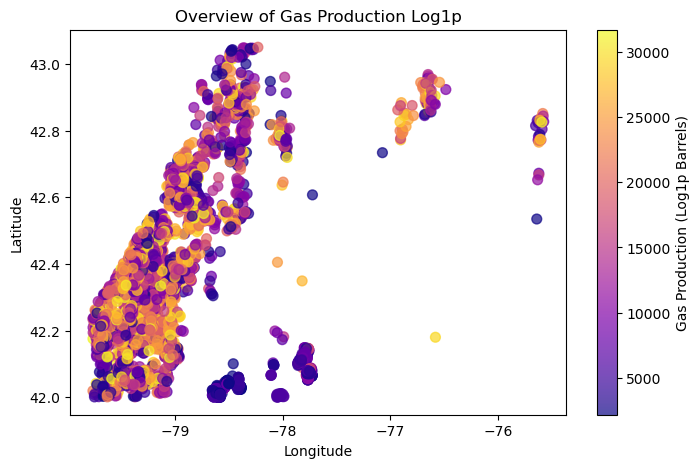

In [18]:
fig, ax = plt.subplots(1, figsize=(8,5))
corr_plot = ax.scatter(np.array(df['longitude']), np.array(df['latitude']), 
                       s=50, c=np.array(df['gas_prod']), cmap='plasma', alpha=0.7)
plt.colorbar(corr_plot).set_label('Gas Production (Log1p Barrels)')
plt.title('Overview of Gas Production Log1p')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
plt.close()

In [19]:
df.to_csv('../data/clean_gaswells.csv', index=False)

In [20]:
try:
    print('Script executed successfully')
except:
    print('FAILED')

Script executed successfully
